In [3]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns

In [4]:
import os
print(os.getcwd())

c:\Users\maili\ProjecteData\Equip_11\Scripts


### Cargar dataset

In [5]:
BASE_DIR = os.getcwd()

csv_path = os.path.join(BASE_DIR, '..', 'Data', 'RRHH - 26062025.csv') # -- cambiar solo la fecha del fichero 

df_RRHH = pd.read_csv(csv_path, sep=';')

df_RRHH

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,14,11,11,2,4,155,12,14,34,"284,031",...,0,1,2,1,0,0,95,196,25,120
1,36,13,4,4,3,118,13,18,50,"239,409",...,0,1,1,1,0,0,98,178,31,120
2,9,6,7,3,1,228,14,16,58,"264,604",...,0,1,2,0,0,1,65,172,22,120
3,28,9,7,3,1,225,26,9,28,"230,290",...,0,1,1,0,0,2,69,169,24,112
4,9,12,3,3,2,228,14,16,58,"222,196",...,0,1,2,0,0,1,65,172,22,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,22,1,10,4,4,179,26,9,30,"265,017",...,0,3,0,0,0,0,56,171,19,64
1106,26,19,5,6,3,300,26,13,43,"237,656",...,0,1,2,1,1,1,77,175,25,64
1107,34,19,12,3,4,118,10,10,37,"261,306",...,0,1,0,0,0,0,83,172,28,56
1108,20,19,4,6,3,260,50,11,36,"326,452",...,0,1,4,1,0,0,65,168,23,56


### Eliminamos duplicados

In [6]:
duplicados_python = df_RRHH[df_RRHH.duplicated(keep=False)]
grupos_duplicados = duplicados_python.value_counts().reset_index().shape[0]
print(f"Grupos únicos de duplicados en Python: {grupos_duplicados}")

Grupos únicos de duplicados en Python: 41


In [7]:
duplicados_grouped = duplicados_python.value_counts().reset_index(name='repeticiones')
duplicados_grouped = duplicados_grouped.sort_values(by='Absenteeism_hours', ascending=False)

duplicados_grouped

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours,repeticiones
6,14,11,11,2,4,155,12,14,34,"284,031",...,1,2,1,0,0,95,196,25,120,3
5,9,6,7,3,1,228,14,16,58,"264,604",...,1,2,0,0,1,65,172,22,120,3
9,36,13,4,4,3,118,13,18,50,"239,409",...,1,1,1,0,0,98,178,31,120,3
10,28,9,7,3,1,225,26,9,28,"230,290",...,1,1,0,0,2,69,169,24,112,3
7,9,12,3,3,2,228,14,16,58,"222,196",...,1,2,0,0,1,65,172,22,112,3
16,11,19,3,2,3,289,36,13,33,"222,196",...,1,2,1,0,1,90,172,30,104,2
18,13,13,7,2,1,369,17,12,31,"264,604",...,1,3,1,0,0,70,169,25,80,2
40,36,13,6,4,3,118,13,18,50,"377,550",...,1,1,1,0,0,98,178,31,80,2
20,14,18,12,3,2,155,12,14,34,"280,549",...,1,2,1,0,0,95,196,25,80,2
34,34,19,12,3,4,118,10,10,37,"261,306",...,1,0,0,0,0,83,172,28,64,2


In [8]:
key_fields = ['ID', 'Reason_absence', 'Month_absence', 'Day_week']

repeticiones = duplicados_grouped.groupby(key_fields).agg(
    veces=('ID', 'count'),
    horas_totales=('Absenteeism_hours', 'sum'),
 ).reset_index()

repeticiones.sort_values(["horas_totales"],ascending=False)

,ID,Reason_absence,Month_absence,Day_week,veces,horas_totales
15,14,11,11,2,1,120
9,9,6,7,3,1,120
36,36,13,4,4,1,120
30,34,19,12,3,2,120
27,28,9,7,3,1,112
10,9,12,3,3,1,112
12,11,19,3,2,1,104
13,13,13,7,2,1,80
37,36,13,6,4,1,80
16,14,18,12,3,1,80


In [9]:
repeticiones_sospechosas = repeticiones[repeticiones['horas_totales'] > 40]
repeticiones_sospechosas

,ID,Reason_absence,Month_absence,Day_week,veces,horas_totales
9,9,6,7,3,1,120
10,9,12,3,3,1,112
12,11,19,3,2,1,104
13,13,13,7,2,1,80
14,14,10,5,2,1,48
15,14,11,11,2,1,120
16,14,18,12,3,1,80
18,20,19,4,6,1,56
19,22,1,10,4,1,64
25,26,19,5,6,1,64


In [10]:
df_flagged = df_RRHH.merge(
    repeticiones_sospechosas[key_fields],
    how='left',
    on=key_fields,
    indicator=True
)

df_flagged

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours,_merge
0,14,11,11,2,4,155,12,14,34,"284,031",...,1,2,1,0,0,95,196,25,120,both
1,36,13,4,4,3,118,13,18,50,"239,409",...,1,1,1,0,0,98,178,31,120,both
2,9,6,7,3,1,228,14,16,58,"264,604",...,1,2,0,0,1,65,172,22,120,both
3,28,9,7,3,1,225,26,9,28,"230,290",...,1,1,0,0,2,69,169,24,112,both
4,9,12,3,3,2,228,14,16,58,"222,196",...,1,2,0,0,1,65,172,22,112,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,22,1,10,4,4,179,26,9,30,"265,017",...,3,0,0,0,0,56,171,19,64,both
1106,26,19,5,6,3,300,26,13,43,"237,656",...,1,2,1,1,1,77,175,25,64,both
1107,34,19,12,3,4,118,10,10,37,"261,306",...,1,0,0,0,0,83,172,28,56,both
1108,20,19,4,6,3,260,50,11,36,"326,452",...,1,4,1,0,0,65,168,23,56,both


In [11]:
sospechosos = df_flagged[df_flagged['_merge'] == 'both']
no_sospechosos = df_flagged[df_flagged['_merge'] == 'left_only']
sospechosos_unique = sospechosos.groupby(key_fields).head(1)
df_RRHH_clean = pd.concat([no_sospechosos, sospechosos_unique]).drop(columns=['_merge']).reset_index(drop=True)
df_RRHH_clean

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,14,19,7,2,1,155,12,14,34,"239,554",...,0,1,2,1,0,0,95,196,25,40
1,10,13,8,2,1,361,52,3,28,"205,917",...,0,1,1,1,0,4,80,172,27,40
2,15,14,11,2,4,291,31,12,40,"306,345",...,0,1,1,1,0,1,73,171,25,40
3,20,13,3,6,2,260,50,11,36,"343,253",...,0,1,4,1,0,0,65,168,23,40
4,17,11,3,2,2,179,22,17,40,"343,253",...,0,2,2,0,1,0,63,170,22,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,34,19,12,3,4,118,10,10,37,"261,306",...,0,1,0,0,0,0,83,172,28,64
1083,22,1,10,4,4,179,26,9,30,"265,017",...,0,3,0,0,0,0,56,171,19,64
1084,26,19,5,6,3,300,26,13,43,"237,656",...,0,1,2,1,1,1,77,175,25,64
1085,20,19,4,6,3,260,50,11,36,"326,452",...,0,1,4,1,0,0,65,168,23,56


### dataframe a analizar

In [12]:
desempenyo = df_RRHH_clean[['ID', 'Hit_target', 'Service_time','Work_load_Average_day', 'Distance_Residence_Work']].drop_duplicates(subset='ID').reset_index(drop=True)
desempenyo.info()
desempenyo.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       386 non-null    int64 
 1   Hit_target               386 non-null    int64 
 2   Service_time             386 non-null    int64 
 3   Work_load_Average_day    386 non-null    object
 4   Distance_Residence_Work  386 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.2+ KB


,ID,Hit_target,Service_time,Work_load_Average_day,Distance_Residence_Work
0,14,97,14,"239,554",12
1,10,92,3,"205,917",52
2,15,93,12,"306,345",31
3,20,95,11,"343,253",50
4,17,95,17,"343,253",22
5,11,98,13,"275,312",36
6,24,81,16,"294,217",25
7,34,100,10,"330,061",10
8,3,98,18,"280,549",51
9,36,92,18,"378,884",13


### Reemplazo punto por coma y cambio tipo de datos de Work_load_Average_day

In [13]:
desempenyo['Work_load_Average_day'] = desempenyo['Work_load_Average_day'].str.replace(',', '.')
desempenyo['Work_load_Average_day'] = pd.to_numeric(desempenyo['Work_load_Average_day'], errors='coerce')

# Verifica el resultado
print(desempenyo['Work_load_Average_day'].dtype)
print(desempenyo['Work_load_Average_day'].head())

float64
0    239.554
1    205.917
2    306.345
3    343.253
4    343.253
Name: Work_load_Average_day, dtype: float64


## Distribucion de Hit_target por Distance_Residence_Work (2 variables numericas) 

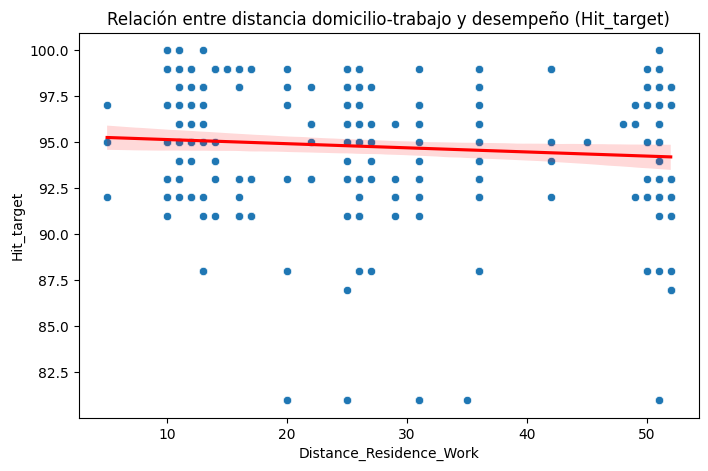

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Distance_Residence_Work', y='Hit_target', data=desempenyo)
sns.regplot(x='Distance_Residence_Work', y='Hit_target', data=desempenyo, scatter=False, color='red')
plt.title('Relación entre distancia domicilio-trabajo y desempeño (Hit_target)')
plt.show()

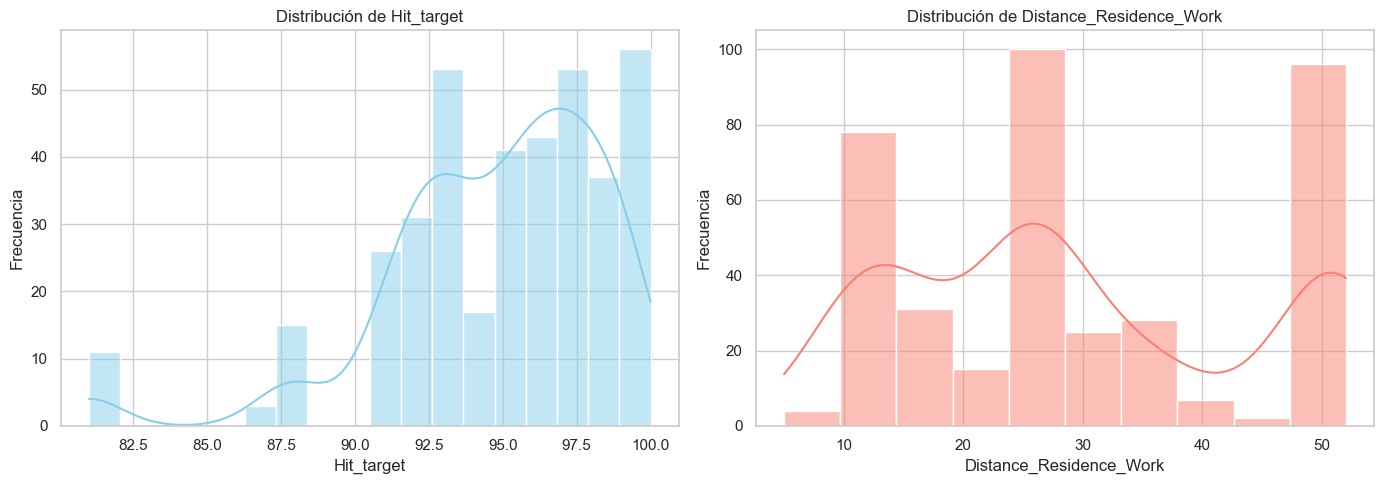

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de Hit_target
sns.histplot(data=desempenyo, x='Hit_target', kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de Hit_target')
axes[0].set_xlabel('Hit_target')
axes[0].set_ylabel('Frecuencia')

# Histograma de Distance_Residence_Work
sns.histplot(data=desempenyo, x='Distance_Residence_Work', kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distribución de Distance_Residence_Work')
axes[1].set_xlabel('Distance_Residence_Work')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Análisis de los histogramas:

Distribución de Hit_target:
La distribución es asimétrica y presenta picos no uniformes, lo que indica que probablemente no sigue una distribución normal.

Distribución de Distance_Residence_Work:
La distribución es claramente multimodal y asimétrica, con picos en valores específicos (como 10, 25 y 50).
Esto sugiere que tampoco sigue una distribución normal.

Test de normalidad formal
✅ Shapiro-Wilk test (recomendado si tienes <5000 observaciones):

Si p > 0.05 → no se rechaza la normalidad → puedes usar t-test.

Si p ≤ 0.05 → los datos no son normales → mejor usar Mann-Whitney U.

In [15]:
from scipy.stats import shapiro
shapiro_hit = shapiro(desempenyo['Hit_target'])
shapiro_dist = shapiro(desempenyo['Distance_Residence_Work'])

print(f'Hit_target → Shapiro p-value = {shapiro_hit.pvalue:.4f}')
print(f'Distance_Residence_Work → Shapiro p-value = {shapiro_dist.pvalue:.4f}')

Hit_target → Shapiro p-value = 0.0000
Distance_Residence_Work → Shapiro p-value = 0.0000


Correlación de Spearman
Este test no requiere normalidad y mide la relación monótona entre dos variables ordinales o continuas.

In [16]:
from scipy.stats import spearmanr

rho, pval = spearmanr(desempenyo['Hit_target'], desempenyo['Distance_Residence_Work'])
print(f"Spearman rho = {rho:.4f}, p-value = {pval:.4f}")

Spearman rho = -0.1208, p-value = 0.0176


### La distancia de la residencia al lugar de trabajo de los empleados SI es estadisticamente significativa en su desempeño. Los que viven mas cerca tienen mejor desempeño

## Distribucion de Hit_target por Service_time (2 variables numericas) 

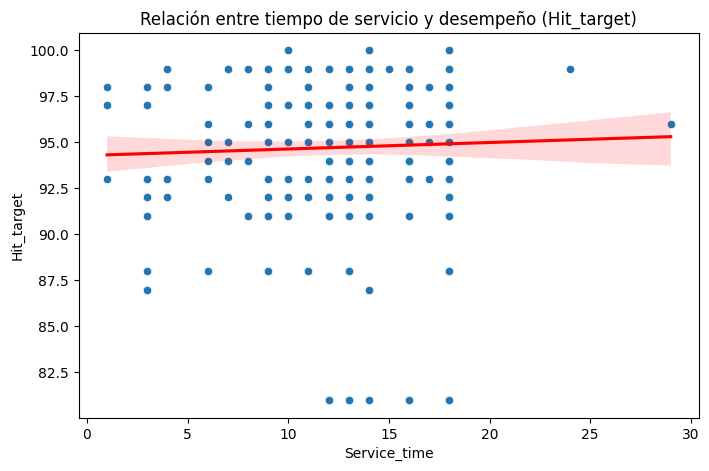

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Service_time', y='Hit_target', data=desempenyo)
sns.regplot(x='Service_time', y='Hit_target', data=desempenyo, scatter=False, color='red')
plt.title('Relación entre tiempo de servicio y desempeño (Hit_target)')
plt.show()

In [18]:
shapiro_hit = shapiro(desempenyo['Hit_target'])
shapiro_dist = shapiro(desempenyo['Service_time'])

print(f'Hit_target → Shapiro p-value = {shapiro_hit.pvalue:.4f}')
print(f'Service_time → Shapiro p-value = {shapiro_dist.pvalue:.4f}')


Hit_target → Shapiro p-value = 0.0000
Service_time → Shapiro p-value = 0.0000


In [19]:
rho, pval = spearmanr(desempenyo['Hit_target'], desempenyo['Service_time'])
print(f"Spearman rho = {rho:.4f}, p-value = {pval:.4f}")

Spearman rho = 0.0893, p-value = 0.0797


### el tiempo de servicio de los empleados no es estadisticamente significativo en su desempeño

## Distribucion de Hit_target por Work_load_Average_day (2 variables numericas - entero y float) 

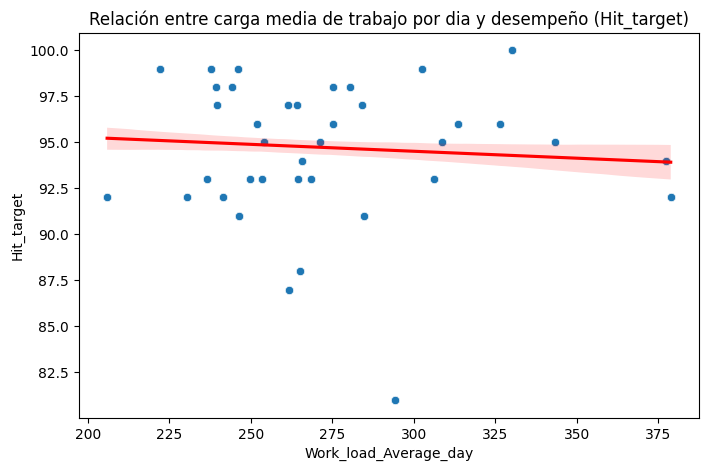

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Work_load_Average_day', y='Hit_target', data=desempenyo)
sns.regplot(x='Work_load_Average_day', y='Hit_target', data=desempenyo, scatter=False, color='red')
plt.title('Relación entre carga media de trabajo por dia y desempeño (Hit_target)')
plt.show()

Tendencia: La línea de regresión es ligeramente descendente, lo que indica una débil relación negativa entre la carga laboral diaria y el desempeño.

Densidad de puntos: Hay mucha dispersión; no hay una clara estructura lineal.

Relación: No parece haber una relación fuerte, aunque mayor carga diaria podría asociarse con leve disminución del desempeño.

<bound method Axes.set of <Axes: title={'center': 'Distribución de Work_load_Average_day'}, xlabel='Work_load_Average_day', ylabel='Count'>>

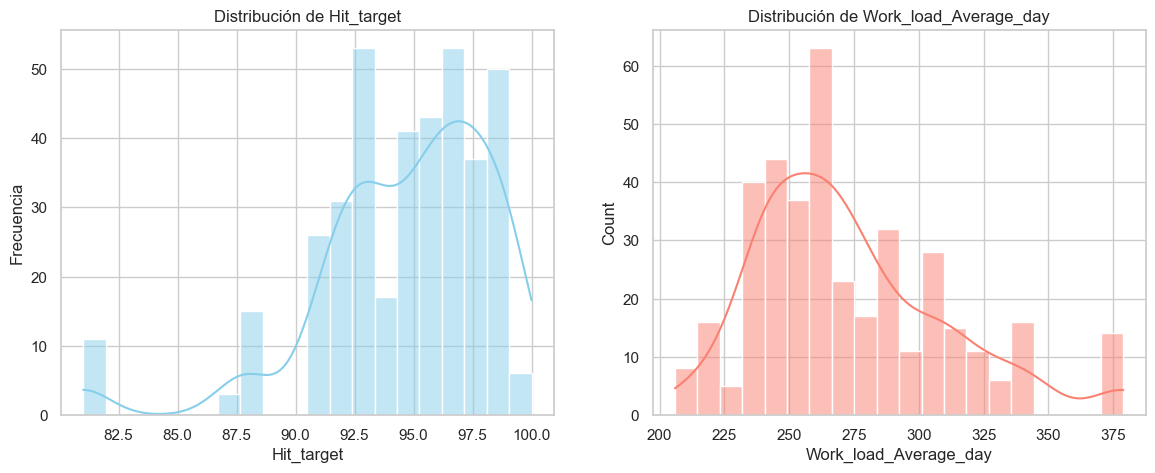

In [24]:
# Ajustar estilo gráfico
sns.set(style="whitegrid")

# Crear figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de Hit_target
sns.histplot(desempenyo['Hit_target'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Hit_target')
axes[0].set_xlabel('Hit_target')
axes[0].set_ylabel('Frecuencia')

# Histograma de Work_load_Average_day
sns.histplot(desempenyo['Work_load_Average_day'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribución de Work_load_Average_day')
axes[1].set_xlabel('Work_load_Average_day')
axes[1].set


 Análisis visual de la distribución
🔹 Hit_target:
La distribución no parece normal: presenta asimetría negativa (cola hacia la izquierda) y posibles picos múltiples.

Esto sugiere que no deberías usar pruebas paramétricas (como la correlación de Pearson o regresión lineal sin transformaciones o validaciones previas).

🔹 Work_load_Average_day:
Claramente asimétrica hacia la derecha (cola larga hacia valores altos).

Esto también viola el supuesto de normalidad.

In [22]:
shapiro_hit = shapiro(desempenyo['Hit_target'])
shapiro_dist = shapiro(desempenyo['Service_time'])

print(f'Hit_target → Shapiro p-value = {shapiro_hit.pvalue:.4f}')
print(f'Work_load_Average_day → Shapiro p-value = {shapiro_dist.pvalue:.4f}')

Hit_target → Shapiro p-value = 0.0000
Work_load_Average_day → Shapiro p-value = 0.0000


In [23]:
rho, pval = spearmanr(desempenyo['Hit_target'], desempenyo['Work_load_Average_day'])
print(f"Spearman rho = {rho:.4f}, p-value = {pval:.4f}")

Spearman rho = -0.1256, p-value = 0.0136


### La carga media de trabajo por dia de los empleados SI es estadisticamente significativa en su desempeño

 Resultado del test de Spearman:
ρ (rho) = -0.1256 → Relación negativa débil entre Work_load_Average_day y Hit_target.

p-value = 0.0136 → Significativo estadísticamente (p < 0.05).

Conclusión:
A mayor carga laboral diaria, el desempeño (Hit_target) tiende a ser ligeramente menor. Aunque la correlación es débil, es significativa, lo que sugiere que la carga de trabajo influye, aunque moderadamente, en el rendimiento.